In [77]:
import sys
#Move to parent folder
sys.path.insert(0, '../croprows-cli/src/')

import croprows_globals as crglobals
import croprows_utils as crutils
import croprows_image_preprocessing as crimgprep
import imutils_perspective as imutils

import os
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
import re

np.seterr(divide='ignore', invalid='ignore')

import imp
imp.reload(crglobals)
imp.reload(crutils)
imp.reload(crimgprep)
imp.reload(imutils)

####################################################################

 #####  ######  ####### ######  ######  ####### #     #  #####     
#     # #     # #     # #     # #     # #     # #  #  # #     #    
#       #     # #     # #     # #     # #     # #  #  # #          
#       ######  #     # ######  ######  #     # #  #  #  #####     
#       #   #   #     # #       #   #   #     # #  #  #       #    
#     # #    #  #     # #       #    #  #     # #  #  # #     #    
 #####  #     # ####### #       #     # #######  ## ##   #####     
                                                  Version 1.0		

####################################################################
croprows_globals [ module loaded ]
croprows_utils [ module loaded ]
croprows_image_processing [ module loaded ]


<module 'imutils_perspective' from '../croprows-cli/src/imutils_perspective.py'>

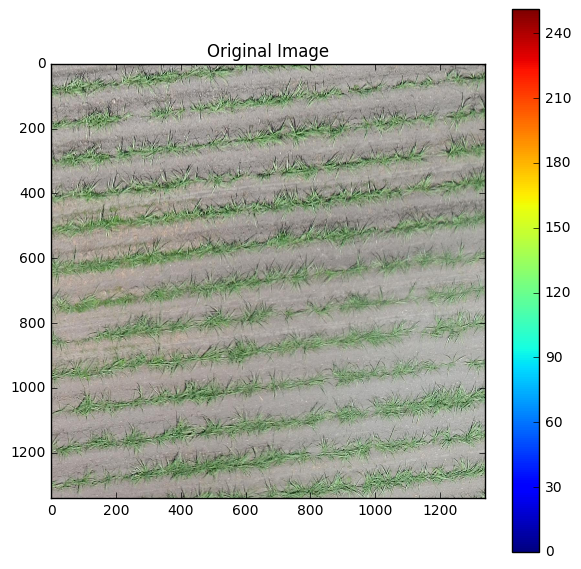

In [78]:
test_images=["../orthomosaics/results/testfile1/mosaic_18_23_1084px_414_tiles/mosaic-cl_11-rw_4.jpg",
             "../orthomosaics/results/testfile3/mosaic_5_5_1077px_25_tiles/mosaic-cl_3-rw_2.jpg",
             "../orthomosaics/results/testfile7/mosaic_10_8_1339px_80_tiles/mosaic-cl_4-rw_2.jpg",
            "../orthomosaics/results/testfile7/mosaic_10_8_1339px_80_tiles/mosaic-cl_3-rw_2.jpg",
            "../orthomosaics/results/testfile7/mosaic_10_8_1339px_80_tiles/mosaic-cl_5-rw_3.jpg"]

#img_url = "../orthomosaics/results/testfile3/mosaic_5_5_1077px_25_tiles/mosaic-cl_3-rw_2.jpg"
#img_url = "../orthomosaics/results/testfile7/mosaic_10_8_1339px_80_tiles/mosaic-cl_3-rw_2.jpg"
#"../orthomosaics/results/testfile7/mosaic_10_8_1339px_80_tiles/mosaic-cl_3-rw_2.jpg"

original_image =crimgprep.readRGBImageByUrl(test_images[4])
plt.figure(figsize=(7, 7))
plt.title("Original Image")
plt.imshow(original_image)
plt.colorbar()
plt.show()



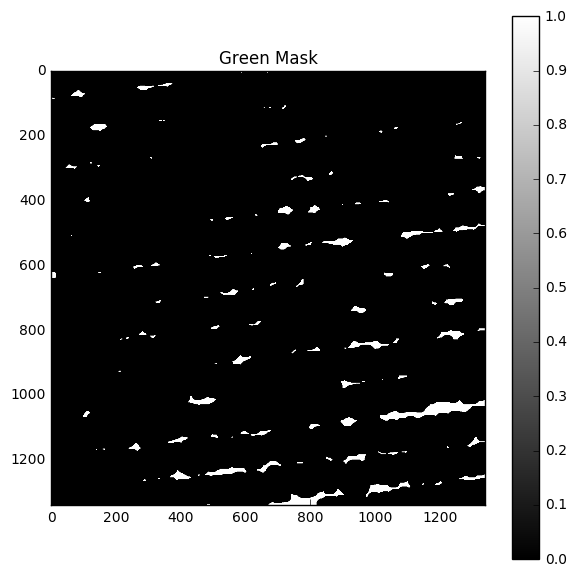

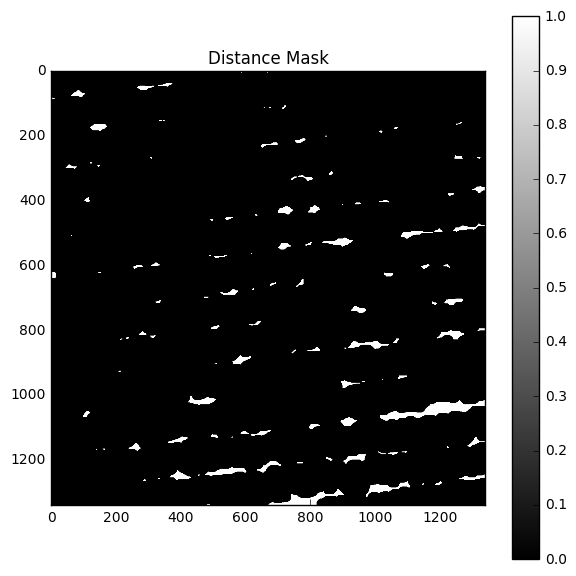

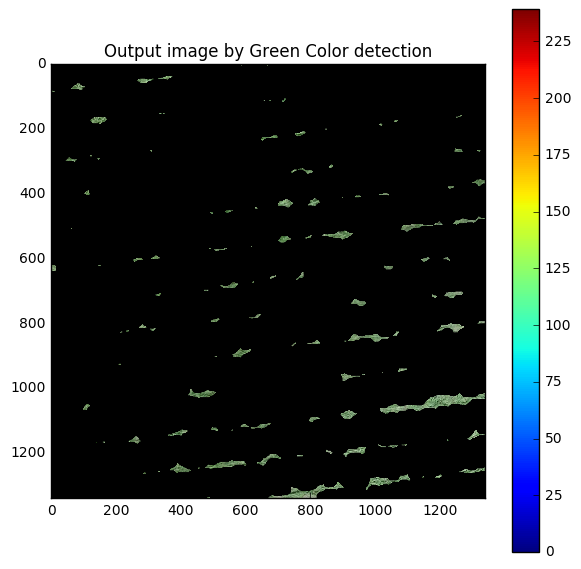

In [79]:
imgc = original_image.copy()

mask_,output_ , bgoutput =crimgprep.imageGreenMask(imgc)

plt.figure(figsize=(7, 7))
plt.title("Green Mask")
plt.imshow(mask_,cmap=plt.get_cmap('gray'))
plt.colorbar()
plt.show()

plt.figure(figsize=(7, 7))
plt.title("Distance Mask")
plt.imshow(bgoutput,cmap=plt.get_cmap('gray'))
plt.colorbar()
plt.show()

plt.figure(figsize=(7, 7))
plt.title("Output image by Green Color detection")
plt.imshow(output_)
plt.colorbar()
plt.show()



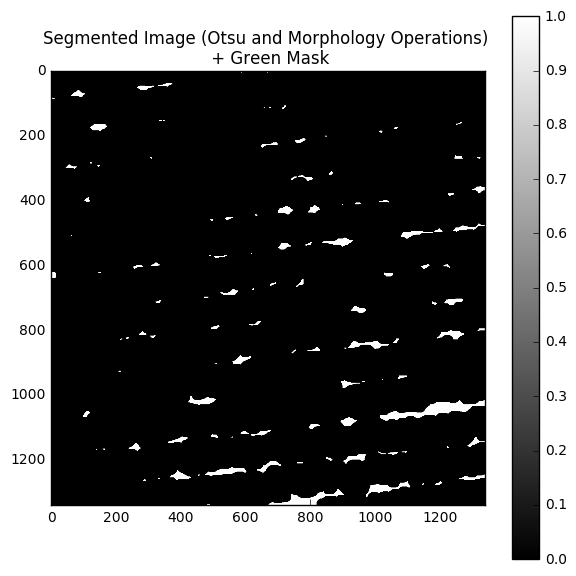

In [80]:
segmentedImage , rgbImage , vi , org  = crimgprep.preProcessingPipeline(original_image)

plt.figure(figsize=(7, 7))
plt.title("Segmented Image (Otsu and Morphology Operations) \n + Green Mask")
plt.imshow(segmentedImage,cmap=plt.get_cmap('gray'))
plt.colorbar()
plt.show()

#bilateral = cv2.bilateralFilter(segmentedImage,15,75,75)
#median = cv2.medianBlur(segmentedImage,15)

#plt.figure(figsize=(7, 7))
#plt.imshow(median,cmap=plt.get_cmap('gray'))
#plt.colorbar()
#plt.show()




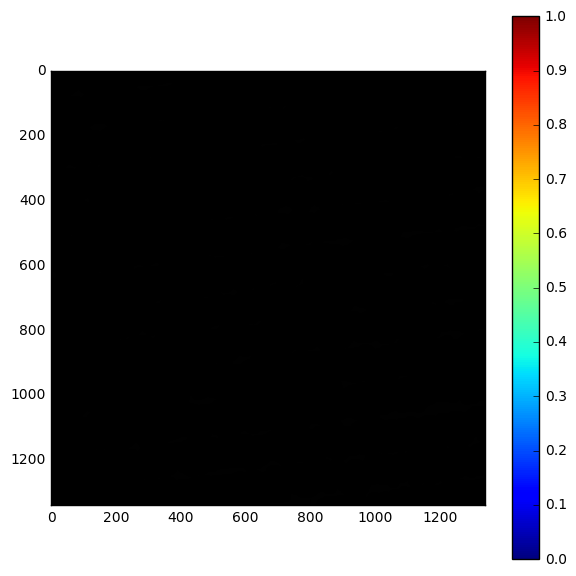

In [81]:
plt.figure(figsize=(7, 7))
plt.imshow(rgbImage)
plt.colorbar()
plt.show()

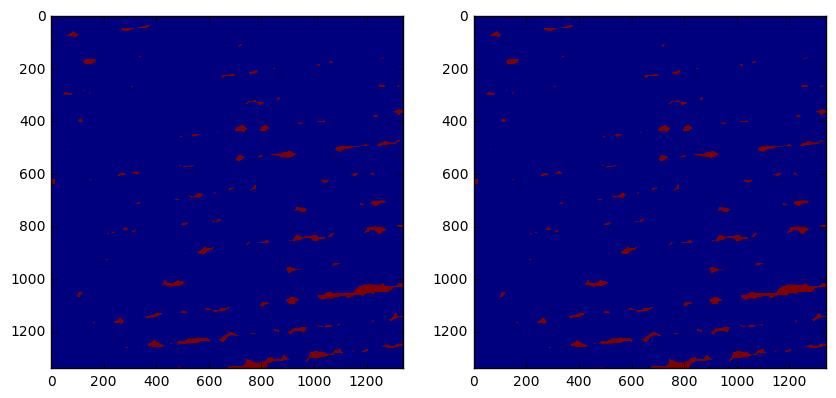

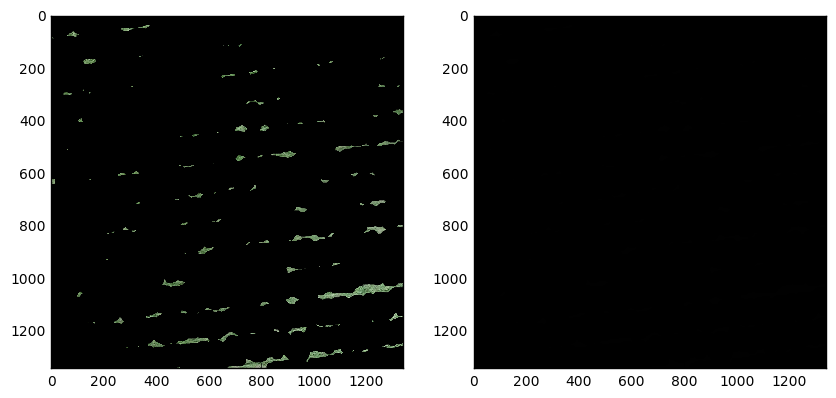

In [82]:
f = plt.figure(figsize=(10,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.imshow(mask_)
ax2.imshow(segmentedImage)

f = plt.figure(figsize=(10,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.imshow(output_)
ax2.imshow(rgbImage)

.........................................................
[*] Contour Count : 10
Contour 1  - Max Angle: 76.9
Contour 2  - Max Angle: 82.2
Contour 3  - Max Angle: 77.0
Contour 4  - Max Angle: 88.4
Contour 5  - Max Angle: 88.8
Contour 6  - Max Angle: 94.2
Contour 7  - Max Angle: 86.7
Contour 8  - Max Angle: 85.8
Contour 9  - Max Angle: 101.1
Contour 10  - Max Angle: 82.2
Contours Angle SD: 4.4
Contours Angle MAX: 88.8
Contours Angle MIN: 76.9
Contours Angle AVG: 83.5
.........................................................


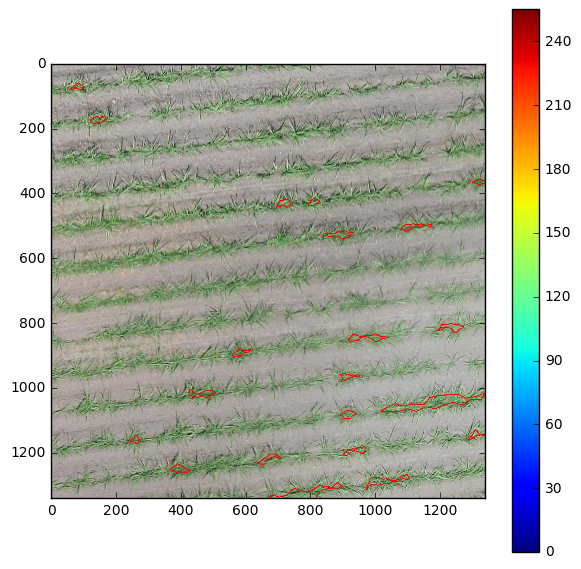

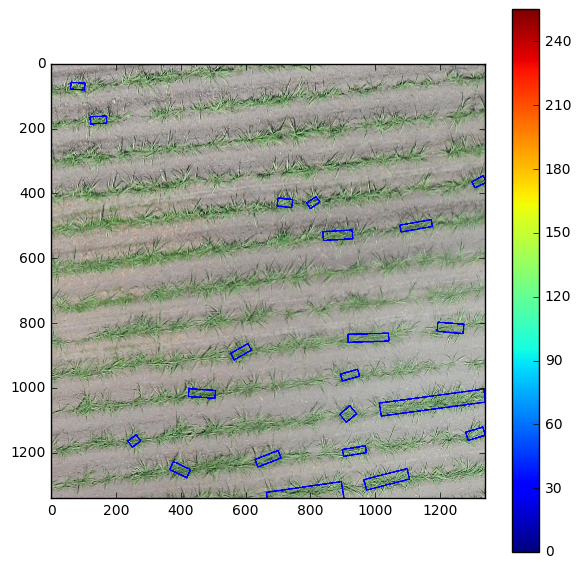

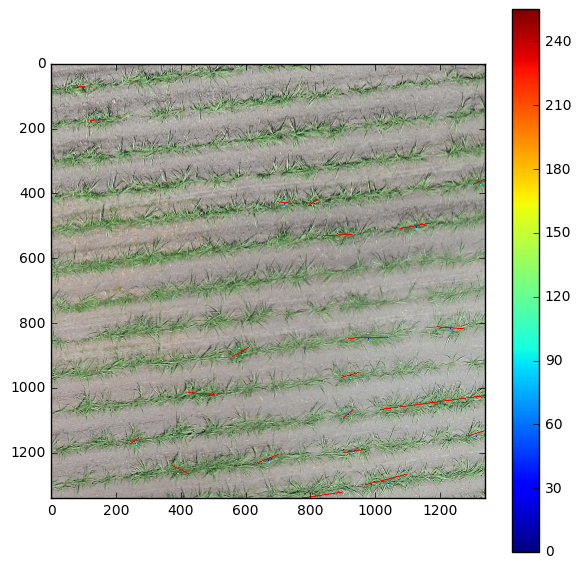

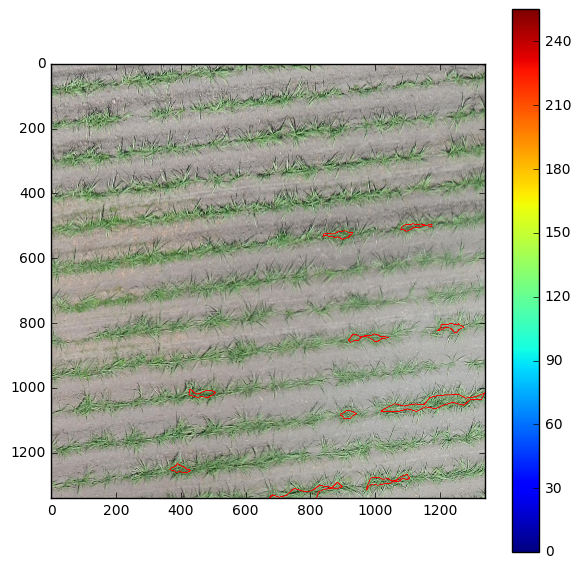

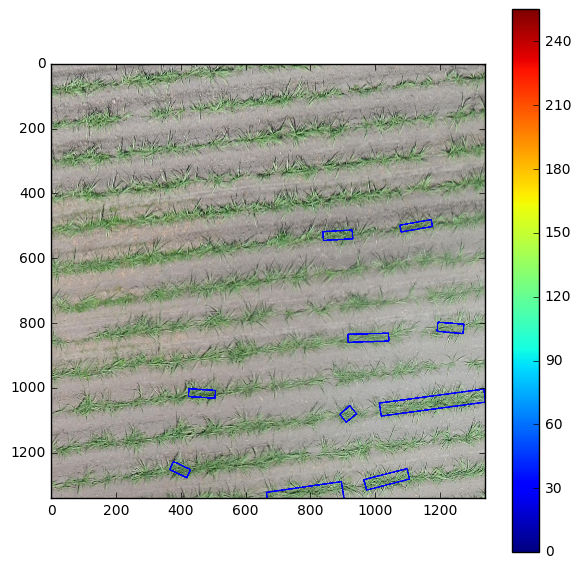

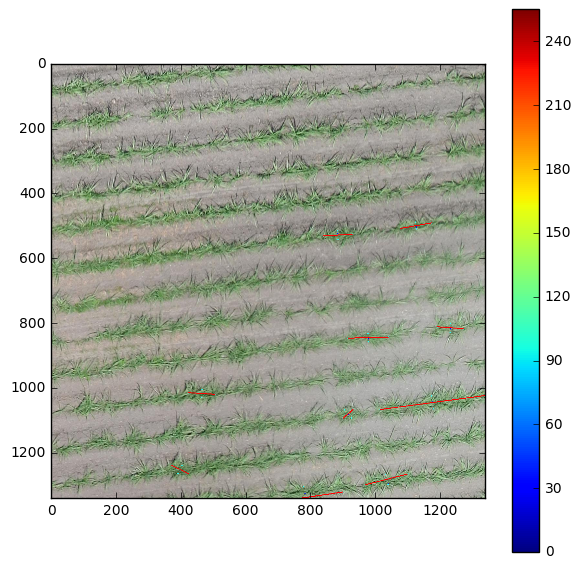

Contour 2  - Max Angle: 76.9
Contour 3  - Max Angle: 77.0
Contour 4  - Max Angle: 101.1
Contour 5  - Max Angle: 70.8
Contour 6  - Max Angle: 77.2
Contour 7  - Max Angle: 74.6
Contour 8  - Max Angle: 77.0
Contour 9  - Max Angle: 82.2
Contour 10  - Max Angle: 82.2
Contour 11  - Max Angle: 94.2
Contour 12  - Max Angle: 81.5
Contour 13  - Max Angle: 66.4
Contour 14  - Max Angle: 88.4
Contour 15  - Max Angle: 86.7
Contour 16  - Max Angle: 88.8
Contour 17  - Max Angle: 85.8
Contour 18  - Max Angle: 85.2
Contour 19  - Max Angle: 67.3
Contour 20  - Max Angle: 84.1
Contour 21  - Max Angle: 82.1
Contour 22  - Max Angle: 81.0


In [83]:
seed = 3 
seed_span= 3


img_edges, img_contours , contoursAll, contoursFiltred,angleFitMinAreaRect , meanAngleFitMinAreaRect , angleFitElipseContours , meanAngleFitElipseContours = crimgprep.buildContours(segmentedImage,seed,seed_span)
    
im = original_image.copy()

    #contoursFiltred2 = sorted(contoursAll, key = cv2.contourArea, reverse = True)[:450] 
    #(contourSorted, boundingBoxes) = crutils.sort_contours(contoursFiltred2, method="left-to-right")

compose_imgcontours , compose_imgsmallboxes , compose_imggeoms = crimgprep.drawContours(im, contoursAll)
plt.figure(figsize=(7, 7))
plt.imshow(compose_imgcontours)
plt.colorbar()
plt.show()



plt.figure(figsize=(7, 7))
plt.imshow(compose_imgsmallboxes)
plt.colorbar()
plt.show()

plt.figure(figsize=(7, 7))
plt.imshow(compose_imggeoms)
plt.colorbar()
plt.show()
    
im = original_image.copy()

compose_imgcontours_ , compose_imgsmallboxes_ , compose_imggeoms_ = crimgprep.drawContours(im, contoursFiltred)

plt.figure(figsize=(7, 7))
plt.imshow(compose_imgcontours_)
plt.colorbar()
plt.show()

plt.figure(figsize=(7, 7))
plt.imshow(compose_imgsmallboxes_)
plt.colorbar()
plt.show()

plt.figure(figsize=(7, 7))
plt.imshow(compose_imggeoms_)
plt.colorbar()
plt.show()



flagCounterContour=0
for cc in contoursAll:
    minAreaRecContours = cv2.minAreaRect(cc)
    boxPointsContours = cv2.boxPoints(minAreaRecContours)
    angleContours = cv2.minAreaRect(boxPointsContours)[-1]
    angleFitMinAreaRect.append(angleContours)
    (x,y),(MA,ma),angleElipse = cv2.fitEllipse(cc)
    angleFitElipseContours.append(angleElipse)
    flagCounterContour+=1
    print('Contour %s  - Max Angle: %s' % ((flagCounterContour+1), round(angleElipse,1)) )
